<a href="https://colab.research.google.com/github/SMMiroE/Herramientas-de-calculo-y-simulacion-de-procesos-dinamicos/blob/main/SMME_Modulo_1__Semana_6_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Curso Herramientas para la simulacion de Sistemas Dinamicos**

**Actividades Semana 6**

**Lenguaje Julia**  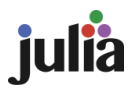
https://julialang.org/

In [ ]:
# @title
versioninfo() #setear a Runtime en Julia  https://julialang.org/learning/

Julia Version 1.10.9
Commit 5595d20a287 (2025-03-10 12:51 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = auto


In [ ]:
# @title

using Plots

In [ ]:
# @title

using Pkg;


In [ ]:
# @title

Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [b964fa9f] + LaTeXStrings v1.4.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [ ]:
# @title
# Instala el kernel de Julia y librerías (ejecutar una vez por sesión)
using Pkg
Pkg.add("IJulia")
Pkg.add("Plots")
Pkg.add("GR") # GR es un backend rápido para Plots
Pkg.add("SpecialFunctions")
import Pkg
Pkg.add("PlotlyJS")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [28b8d3ca] + GR v0.73.16
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [276daf66] + SpecialFunctions v2.5.1
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
   Installed AssetRegistry ───────── v0.1.0
   Installed Lazy ────────────────── v0.15.1
   Installed Pidfile ─────────────── v1.3.0
   Installed PlotlyKaleido ───────── v2.3.0
   Installed Hiccup ──────────────── v0.2.2
   Installed Blink ───────────────── v0.12.9
   Installed PlotlyBase ─────────

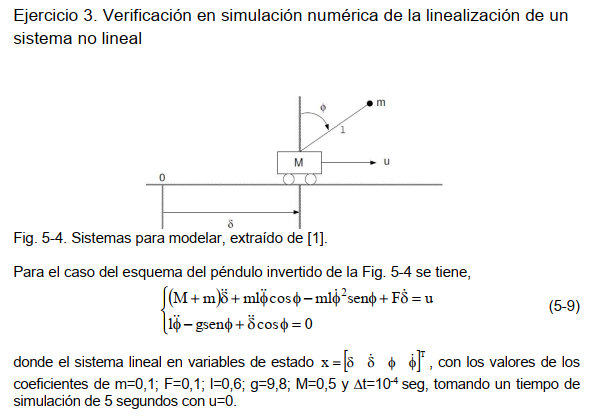

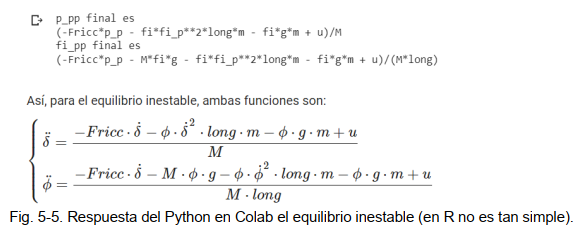

Se pide:
1- Obtener simulaciones del sistema (5-9) en las condiciones iniciales
x0 = (0 0 -0,01 0)T y x0 = (0 0 3,2 0)T , empleando una integración
Euler adecuado a las constantes de tiempo del sistema linealizado (por ejemplo
Dt=10-4). El tiempo de simulación será de 10 segundos en cada caso, con u=0.

In [ ]:
# @title
install.packages("patchwork")
install.packages("gridExtra")

LoadError: UndefVarError: `install` not defined

Para el estado estable fi= pi

In [ ]:
# @title
using Plots
using LinearAlgebra # For matrix operations like `inv`, `*`, `eigen`
using Printf      # For formatted printing like `sprintf`

## Definition of System Parameters
m_val = 0.1     # Pendulum mass (kg)
Fricc_val = 0.1   # Cart friction coefficient (Ns/m)
long_val = 0.6    # Pendulum length (m)
g_val = 9.8       # Acceleration of gravity (m/s^2)
M_val = 0.5       # Cart mass (kg)

## Simulation Configuration
h_val = 0.0001   # Time step (s)
tiempo_final = 10.0 # Final simulation time (s)
num_pasos = floor(Int, tiempo_final / h_val) # Number of steps

## Initial Conditions
# Nonlinear Model
# Julia uses 1-based indexing, so arrays need to be num_pasos + 1 long
alfa = zeros(num_pasos + 1)
omega = zeros(num_pasos + 1)
p = zeros(num_pasos + 1)
p_p = zeros(num_pasos + 1)
u = zeros(num_pasos + 1) # Control action (u=0 for open loop)

alfa[1] = 3.2    # Deviation from stable equilibrium (pi rad)
omega[1] = 0.0
p[1] = 0.0
p_p[1] = 0.0
u[1] = 0.0

# Linearized Model (at stable equilibrium: X0_eq = [0, 0, pi, 0]')
alfal = zeros(num_pasos + 1)
omegal = zeros(num_pasos + 1)
pl = zeros(num_pasos + 1)
p_pl = zeros(num_pasos + 1)

# Initial state for the linearized model
X_lineal = [p[1], p_p[1], alfa[1], omega[1]]
X0_eq_estable = [0.0, 0.0, pi, 0.0] # Equilibrium point for linearization

# Initialize the first values for the linearized variables
pl[1] = X_lineal[1]
p_pl[1] = X_lineal[2]
alfal[1] = X_lineal[3]
omegal[1] = X_lineal[4]

# Matrix A of the linearized system at stable equilibrium (phi = pi)
# Julia matrices are defined row-by-row
Mat_A_estable = [
    0.0             1.0             0.0                             0.0;
    0.0             -Fricc_val / M_val -m_val * g_val / M_val        0.0;
    0.0             0.0             0.0                             1.0;
    0.0             -Fricc_val / (long_val * M_val) -g_val * (m_val + M_val) / (long_val * M_val) 0.0
]

# Matrix B of the linearized system (as a column vector in Julia)
Mat_B = [0.0; 1/M_val; 0.0; 1/(long_val*M_val)]

## Simulation Loop
println("Iniciando simulación para Equilibrio Estable...")
tiempo_inicio = time() # Use `time()` for seconds since epoch

for i in 1:num_pasos
    # --- Nonlinear System Variables ---
    current_alfa = alfa[i]
    current_omega = omega[i]
    current_p_p = p_p[i]
    current_u = u[i]

    # Calculate cos and sin of the current angle for nonlinear equations
    cos_alfa = cos(current_alfa)
    sin_alfa = sin(current_alfa)

    # **KEY CORRECTION: Solve p_pp and tita_pp simultaneously**
    # Coupled Nonlinear Matrix A_coupled_NL for the acceleration equations
    A_coupled_NL = [
        (M_val + m_val)         (m_val * long_val * cos_alfa);
        (m_val * long_val * cos_alfa) (m_val * long_val^2)
    ]

    # Coupled Nonlinear Vector B_coupled_NL for the acceleration equations
    B_coupled_NL = [
        (current_u - Fricc_val * current_p_p + m_val * long_val * current_omega^2 * sin_alfa);
        (m_val * g_val * long_val * sin_alfa)
    ]

    # Solve the system for accelerations (p_pp and tita_pp)
    # Using `\` for matrix division in Julia is equivalent to `solve` in R/Octave
    # It's more numerically stable than `inv(A_coupled_NL) * B_coupled_NL`
    accelerations_NL = try
        A_coupled_NL \ B_coupled_NL
    catch e
        @warn "Error al resolver el sistema de aceleraciones en el paso $(i): $(e.msg)"
        [0.0, 0.0] # Return 0 to prevent simulation halt
    end

    p_pp_val = accelerations_NL[1]
    tita_pp_val = accelerations_NL[2]

    # Update nonlinear model states (Euler explicit)
    p_p[i+1] = current_p_p + h_val * p_pp_val
    p[i+1] = p[i] + h_val * current_p_p
    omega[i+1] = current_omega + h_val * tita_pp_val
    alfa[i+1] = current_alfa + h_val * current_omega

    # --- Linearized System ---
    # The linearized model is calculated from the deviation from equilibrium (X_lineal - X0_eq_estable)
    # Note: `u[i]` is a single scalar from the `u` array, so `Mat_B * u[i]` works.
    derivadas_lineal = Mat_A_estable * (X_lineal - X0_eq_estable) + Mat_B * u[i]
    X_lineal = X_lineal + h_val * derivadas_lineal

    # Store linearized model states
    pl[i+1] = X_lineal[1]
    p_pl[i+1] = X_lineal[2]
    alfal[i+1] = X_lineal[3]
    omegal[i+1] = X_lineal[4]
end
tiempo_fin = time()
@printf "Simulación terminada. Tiempo de cálculo: %.2f segundos.\n" (tiempo_fin - tiempo_inicio)

## Preparation for Plotting
tiempo = 0.0:h_val:tiempo_final
color_nl = :blue # Color for nonlinear curves
color_l = :black # Color for linear curves

# Plotting the results (using the same titlefontsize as before)

# Plot of Pendulum Angle (alfa)
plot_alfa_estable = plot(tiempo, alfa,
                         label="No Lineal",
                         title="Ángulo del Péndulo (Equilibrio Estable)",
                         titlefontsize=12,
                         xlabel="Tiempo (s)",
                         ylabel="Ángulo (rad)",
                         color=color_nl,
                         linewidth=0.8,
                         legend=:bottomright, # Added legend for clarity
                         grid=true)
plot!(plot_alfa_estable, tiempo, alfal,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)
hline!(plot_alfa_estable, [pi], linestyle=:dash, color=:gray50, label="Equilibrio (π)") # Line for stable equilibrium

# Plot of Angular Velocity (omega)
plot_omega_estable = plot(tiempo, omega,
                          label="No Lineal",
                          title="Velocidad Angular (Equilibrio Estable)",
                          titlefontsize=12,
                          xlabel="Tiempo (s)",
                          ylabel="Velocidad Angular (rad/s)",
                          color=color_nl,
                          linewidth=0.8,
                          legend=:bottomright,
                          grid=true)
plot!(plot_omega_estable, tiempo, omegal,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# Plot of Cart Position (p)
plot_p_estable = plot(tiempo, p,
                      label="No Lineal",
                      title="Posición del Carro (Equilibrio Estable)",
                      titlefontsize=12,
                      xlabel="Tiempo (s)",
                      ylabel="Posición (m)",
                      color=color_nl,
                      linewidth=0.8,
                      legend=:bottomright,
                      grid=true)
plot!(plot_p_estable, tiempo, pl,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# Plot of Cart Velocity (p_p)
plot_pp_estable = plot(tiempo, p_p,
                       label="No Lineal",
                       title="Velocidad del Carro (Equilibrio Estable)",
                       titlefontsize=12,
                       xlabel="Tiempo (s)",
                       ylabel="Velocidad (m/s)",
                       color=color_nl,
                       linewidth=0.8,
                       legend=:bottomright,
                       grid=true)
plot!(plot_pp_estable, tiempo, p_pl,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# --- Phase Plots ---
# Plot of Pendulum Phase (alfa vs. omega)
plot_fase_alfa_omega_estable = plot(alfa, omega,
                                    label="No Lineal",
                                    title="Fase Péndulo (Equilibrio Estable)",
                                    titlefontsize=12,
                                    xlabel="Ángulo (rad)",
                                    ylabel="Velocidad Angular (rad/s)",
                                    color=color_nl,
                                    linewidth=0.8,
                                    legend=:none, # No need for legend here if only one line
                                    grid=true)
plot!(plot_fase_alfa_omega_estable, alfal, omegal,
      label="Lineal",
      color=color_l,
      linewidth=0.05, # Thin line for phase plot of linearized
      linestyle=:solid)

# Plot of Cart Phase (p vs. p_p)
plot_fase_p_pp_estable = plot(p, p_p,
                              label="No Lineal",
                              title="Fase Carro (Equilibrio Estable)",
                              titlefontsize=12,
                              xlabel="Posición (m)",
                              ylabel="Velocidad (m/s)",
                              color=color_nl,
                              linewidth=0.8,
                              legend=:none,
                              grid=true)
plot!(plot_fase_p_pp_estable, pl, p_pl,
      label="Lineal",
      color=color_l,
      linewidth=0.05, # Thin line for phase plot of linearized
      linestyle=:solid)


# Combine plots using `plot` with `layout`
# Time plots: 2 columns, 2 rows
time_plots_combined = plot(plot_alfa_estable, plot_omega_estable, plot_p_estable, plot_pp_estable,
                           layout=(2,2),
                           size=(1000, 800), # Adjust figure size as needed
                           plot_title="Péndulo Invertido: Modelos No Lineal y Lineal (Equilibrio Estable)"
                          )

# Phase plots: 2 columns, 1 row
phase_plots_combined = plot(plot_fase_alfa_omega_estable, plot_fase_p_pp_estable,
                            layout=(1,2),
                            size=(1000, 400), # Adjust figure size as needed
                            plot_title="Péndulo Invertido: Trayectorias de Fase (Equilibrio Estable)"
                           )

display(time_plots_combined) # Display the combined time plots
display(phase_plots_combined) # Display the combined phase plots

## Eigenvalue Interpretation
println("\n-----------------------------------------")
println("Autovalores para el Equilibrio Estable:")

# Function to interpret eigenvalues
function interpret_eigenvalues(eigenvalues)
    for (i, val) in enumerate(eigenvalues) # Use enumerate for index and value
        real_part = real(val) # Use `real` and `imag` for complex numbers
        imag_part = imag(val)

        @printf "Autovalor %d: %.4f + %.4fi\n" i real_part imag_part

        # Behavior based on real and imaginary parts
        if abs(imag_part) > 1e-9 # If there's a significant imaginary part (oscillation)
            if real_part < -1e-9
                println("   - Comportamiento: Oscilación Amortiguada (Espiral Convergente)")
                @printf "   - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n" abs(imag_part)
                @printf "   - Tasa de Amortiguación: %.2f\n" -real_part
            elseif real_part > 1e-9
                println("   - Comportamiento: Oscilación Creciente (Espiral Divergente) - ¡INESTABLE!")
            else
                println("   - Comportamiento: Oscilación Sostenida (Órbita)")
            end
        else # If purely real (no oscillation)
            if real_part < -1e-9
                println("   - Comportamiento: Decaimiento Exponencial (Convergencia Directa)")
                @printf "   - Tasa de Decaimiento: %.2f\n" -real_part
            elseif real_part > 1e-9
                println("   - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!")
            else
                println("   - Comportamiento: Constante (punto de equilibrio o linea)")
            end
        end
    end
    println("-----------------------------------------")
end

interpret_eigenvalues(eigenvalues_A) # Use eigenvalues_A (calculated earlier)

Analisis de las respuestas:

El comportamiento oscilatorio amortiguado del sistema coincide con la presencia de los autovalores complejos 1 y 2 y con su parte real negativa.

El Autovalor 3 real negativo aporta a la amortiguacion.

El avance de la posicion del carro queda explicada por el autovalor 4.

Angulo vs. tiempo: Se observa que el angulo del pendulo oscila de manera amortiguada, alrededor del punto de equilibrio estable.

Velocidad angular vs tiempo: la velocidad tambien oscila de manera amortiguada.

Posicion carro vs tiempo: El carro se mueve de atras hacia adelante (oscila) y se desplaza hacia la derecha.

Velocidad carro vs tiempo: La velocidad del carro oscila de manera amortiguada.

Velocidad angular vs angulo: Se observa una espiral que se acerca al punto de equilibrio del pendulo (pi, 0). Explicado por la presencia de autovalores complejos con parte real negativa.

Velocidad del carro vs Posicion del carro: Se observa una espiral que se acerca a la posicion final del carro (x, 0). Explicado por la presencia de autovalores complejos con parte real negativa.

El modelo lineal coincide con el modelo no lineal para el tiempo de simulacion debido a que se aplica para pequeños angulos alrededor del equilibrio estable.

Para el estado inestable fi=0

In [ ]:
# @title
using Plots
using LinearAlgebra # Para operaciones con matrices como `inv`, `*`, `eigen`
using Printf      # Para formato de texto (similar a sprintf)

## Parámetros del Sistema
m_val = 0.1      # Masa del péndulo (kg)
Fricc_val = 0.1    # Coeficiente de fricción (Ns/m)
long_val = 0.6   # Longitud del péndulo (m)
g_val = 9.8      # Aceleración de la gravedad (m/s^2)
M_val = 0.5      # Masa del carro (kg)
h_val = 0.0001   # Paso de tiempo (s)
tiempo_final = 10.0 # Tiempo total de simulación (s)
n_steps = floor(Int, tiempo_final / h_val) # Número de pasos

## Inicialización de vectores
# Julia usa 1-based indexing, así que los arrays necesitan ser de `n_steps + 1` de largo
omega = zeros(n_steps + 1) # Velocidad angular del péndulo
alfa = zeros(n_steps + 1)  # Ángulo del péndulo
p = zeros(n_steps + 1)     # Posición del carro
p_p = zeros(n_steps + 1)   # Velocidad del carro
u = zeros(n_steps + 1)     # Acción de control (entrada), inicializada a ceros por defecto

## Condiciones iniciales (equilibrio inestable phi ≈ 0)
alfa[1] = -0.01 # Pequeño desvío desde phi = 0
omega[1] = 0.0
p[1] = 0.0
p_p[1] = 0.0

color_nl = :blue # Color para las curvas no lineales
color_l = :black # Color para las curvas lineales

## Matrices del sistema linealizado (equilibrio inestable phi ≈ 0)
# Julia matrices are defined row-by-row
Mat_A = [
    0.0             1.0             0.0                             0.0;
    0.0             -Fricc_val / M_val -m_val * g_val / M_val        0.0;
    0.0             0.0             0.0                             1.0;
    0.0             Fricc_val / (long_val * M_val) (M_val + m_val) * g_val / (long_val * M_val) 0.0
]

Mat_B = [0.0; 1/M_val; 0.0; 1/(long_val*M_val)] # as a column vector

## Punto de equilibrio para la linealización
X0_eq = [0.0, 0.0, 0.0, 0.0]

## Inicialización resultados del sistema linealizado
x_linear = [p[1], p_p[1], alfa[1], omega[1]] # Estado inicial del sistema linealizado

pl = zeros(n_steps + 1)    # Posición carro linealizada
p_pl = zeros(n_steps + 1)  # Velocidad carro linealizada
alfal = zeros(n_steps + 1) # Ángulo linealizado
omegal = zeros(n_steps + 1) # Velocidad angular linealizada

# Almacenar los valores iniciales
pl[1] = x_linear[1]
p_pl[1] = x_linear[2]
alfal[1] = x_linear[3]
omegal[1] = x_linear[4]

## Simulación
start_time_julia = time() # Iniciar el temporizador

for i in 1:n_steps
    # --- Simulación No Lineal ---
    sin_phi = sin(alfa[i])
    cos_phi = cos(alfa[i])

    # NOTE: The R code defines A_nl and b_nl slightly differently than standard
    # derivation, but it's equivalent to solving for p_pp and tita_pp.
    # The structure `A_nl * [p_pp; tita_pp] = b_nl` is implied.
    # From R:
    # A_nl = [ 1, m_val * long_val * cos_phi / (M_val + m_val);
    #          cos_phi / long_val, 1 ]
    # b_nl = [ (u[i] + m_val * long_val * omega[i]^2 * sin_phi - Fricc_val * p_p[i]) / (M_val + m_val);
    #          g_val * sin_phi / long_val ]

    # Julia equivalent of A_nl
    A_nl = [
        1.0                 (m_val * long_val * cos_phi) / (M_val + m_val);
        cos_phi / long_val  1.0
    ]

    # Julia equivalent of b_nl
    b_nl = [
        (u[i] + m_val * long_val * omega[i]^2 * sin_phi - Fricc_val * p_p[i]) / (M_val + m_val);
        g_val * sin_phi / long_val
    ]

    sol_nl = try
        A_nl \ b_nl # Solve the system for accelerations
    catch e
        @warn "Error solving nonlinear system at step $(i): $(e.msg)"
        [0.0, 0.0] # Return zeros on error
    end

    p_pp_val = sol_nl[1]
    tita_pp_val = sol_nl[2] # Angular acceleration

    # Euler integration for Nonlinear system
    p_p[i + 1] = p_p[i] + h_val * p_pp_val
    p[i + 1] = p[i] + h_val * p_p[i]
    omega[i + 1] = omega[i] + h_val * tita_pp_val
    alfa[i + 1] = alfa[i] + h_val * omega[i]

    # --- Linear Simulation ---
    # xp_linear = Mat_A * (x_linear - X0_eq) + Mat_B * u[i]
    derivadas_lineal = Mat_A * (x_linear - X0_eq) + Mat_B * u[i]
    x_linear = x_linear + h_val * derivadas_lineal

    # Store linearized system results
    pl[i+1] = x_linear[1]
    p_pl[i+1] = x_linear[2]
    alfal[i+1] = x_linear[3]
    omegal[i+1] = x_linear[4]
end

## Time vector for plotting
t_vector = 0.0:h_val:tiempo_final

## Plotting with Plots.jl
# Set Y-limits for better visualization of divergence
y_lim_alfa_min = -6.0
y_lim_alfa_max = 0.0

y_lim_omega_min = -10.0
y_lim_omega_max = 10.0

y_lim_p_min = -0.1
y_lim_p_max = 0.1

y_lim_pp_min = -1.0
y_lim_pp_max = 1.0

# 1. Plot of Angular Velocity (Omega)
plot_omega = plot(t_vector, omega,
                  label="No Lineal",
                  title="Velocidad Angular",
                  titlefontsize=12,
                  xlabel="Tiempo (s)",
                  ylabel="Velocidad Angular (rad/s)",
                  color=color_nl,
                  linewidth=0.8,
                  legend=:topright, # Changed legend position
                  grid=true,
                  ylims=(y_lim_omega_min, y_lim_omega_max)) # ZOOM Y
plot!(plot_omega, t_vector, omegal,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# 2. Plot of Angle (Alfa)
plot_alfa = plot(t_vector, alfa,
                 label="No Lineal",
                 title="Ángulo",
                 titlefontsize=12,
                 xlabel="Tiempo (s)",
                 ylabel="Ángulo (rad)",
                 color=color_nl,
                 linewidth=0.8,
                 legend=:topright, # Changed legend position
                 grid=true,
                 ylims=(y_lim_alfa_min, y_lim_alfa_max)) # ZOOM Y
hline!(plot_alfa, [0.0], color=:darkgrey, linewidth=0.8, linestyle=:dash, label="Equilibrio (0)") # Equilibrium line at 0
hline!(plot_alfa, [-pi], color=:darkgreen, linewidth=0.8, linestyle=:dash, label="Equilibrio (-π)") # Equilibrium line at -pi
plot!(plot_alfa, t_vector, alfal,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)


# 3. Plot of Cart Position (p)
plot_p = plot(t_vector, p,
              label="No Lineal",
              title="Posición carro",
              titlefontsize=12,
              xlabel="Tiempo (s)",
              ylabel="Posición (m)",
              color=color_nl,
              linewidth=0.8,
              legend=:topright, # Changed legend position
              grid=true,
              ylims=(y_lim_p_min, y_lim_p_max)) # ZOOM Y
plot!(plot_p, t_vector, pl,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# 4. Plot of Cart Velocity (p_p)
plot_pp = plot(t_vector, p_p,
               label="No Lineal",
               title="Velocidad carro",
               titlefontsize=12,
               xlabel="Tiempo (s)",
               ylabel="Velocidad (m/s)",
               color=color_nl,
               linewidth=0.8,
               legend=:topright, # Changed legend position
               grid=true,
               ylims=(y_lim_pp_min, y_lim_pp_max)) # ZOOM Y
plot!(plot_pp, t_vector, p_pl,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# 5. Plot of Control Action (u)
plot_u = plot(t_vector, u,
              label=false, # No need for legend for single line
              title="Acción de control",
              titlefontsize=12,
              xlabel="Tiempo en Seg.",
              ylabel="Control (u)",
              color=color_nl,
              linewidth=0.8,
              grid=true)

# Combine plots for Figure 1 using Plots.jl layout
# (plot_omega | plot_alfa) / (plot_p | plot_pp) / plot_u
fig1_combined = plot(plot_omega, plot_alfa, plot_p, plot_pp, plot_u,
                     layout=@layout([a b; c d; e]), # Custom layout
                     size=(1000, 1000), # Adjust figure size as needed
                     plot_title="Péndulo Invertido: Modelos No Lineal y Lineal (Equilibrio Inestable)",
                     plot_titlefontsize=14 # Global title for the combined plot
                    )
display(fig1_combined)

## Figure 2: Phase Plots

# NEW: Subsampling data for phase plots
subsample_factor = 20 # Take 1 out of every 20 points
# Using `1:subsample_factor:length(t_vector)` for Julia's indexing
idx_subsample = 1:subsample_factor:length(t_vector)

# 1. Phase Space: Angle vs. Angular Velocity
plot_fase_alfa_omega = plot(alfa[idx_subsample], omega[idx_subsample],
                            label="No Lineal",
                            title="Espacio de Fases: Ángulo vs. Velocidad Angular",
                            titlefontsize=12,
                            xlabel="Ángulo (rad)",
                            ylabel="Velocidad angular (rad/s)",
                            color=color_nl,
                            linewidth=0.8,
                            legend=:bottomright,
                            grid=true,
                            xlims=(y_lim_alfa_min, y_lim_alfa_max),
                            ylims=(y_lim_omega_min, y_lim_omega_max))
plot!(plot_fase_alfa_omega, alfal[idx_subsample], omegal[idx_subsample],
      label="Lineal",
      color=color_l,
      linewidth=0.8, # You mentioned 0.05 in R, but 0.8 is fine with subsampling
      linestyle=:solid)

# 2. Phase Space: Cart Position vs. Cart Velocity
plot_fase_p_pp = plot(p[idx_subsample], p_p[idx_subsample],
                      label="No Lineal",
                      title="Espacio de Fases: Posición vs. Velocidad Carro",
                      titlefontsize=12,
                      xlabel="Posición carro (m)",
                      ylabel="Velocidad carro (m/s)",
                      color=color_nl,
                      linewidth=0.8,
                      legend=:bottomright,
                      grid=true,
                      xlims=(y_lim_p_min, y_lim_p_max),
                      ylims=(y_lim_pp_min, y_lim_pp_max))
plot!(plot_fase_p_pp, pl[idx_subsample], p_pl[idx_subsample],
      label="Lineal",
      color=color_l,
      linewidth=0.8, # You mentioned 0.05 in R, but 0.8 is fine with subsampling
      linestyle=:solid)

# Combine plots for Figure 2
fig2_combined = plot(plot_fase_alfa_omega, plot_fase_p_pp,
                     layout=(1,2),
                     size=(1000, 400),
                     plot_title="Péndulo Invertido: Trayectorias de Fase (Equilibrio Inestable)",
                     plot_titlefontsize=14
                    )
display(fig2_combined)

## Computation Time
end_time_julia = time()
TCalculo = end_time_julia - start_time_julia
@printf "\nTiempo de cálculo = %.4f segundos\n" TCalculo

## Eigenvalue Analysis
# Calculate eigenvalues of the linearized system matrix
eigen_results_inestable = eigvals(Mat_A)

println("\n--- Análisis de Autovalores para el Equilibrio Inestable ---\n")

# Function to interpret eigenvalues (re-using the one from last time, it's robust)
function interpret_eigenvalues(eigenvalues)
    for (i, val) in enumerate(eigenvalues)
        real_part = real(val)
        imag_part = imag(val)

        @printf "Autovalor %d: %.4f %+.4fi\n" i real_part imag_part

        if abs(real_part) < 1e-5 && abs(imag_part) < 1e-5
            println("   - Comportamiento: Constante (punto de equilibrio o linea)")
        elseif abs(real_part) < 1e-5
            println("   - Comportamiento: Oscilación Pura (Centro)")
            @printf "   - Frecuencia de Oscilación: %.2f rad/s\n" abs(imag_part)
        elseif real_part < 0
            if abs(imag_part) < 1e-5
                println("   - Comportamiento: Decaimiento Exponencial (Convergencia Directa)")
                @printf "   - Tasa de Decaimiento: %.2f\n" abs(real_part)
            else
                println("   - Comportamiento: Oscilación Amortiguada (Espiral Convergente)")
                @printf "   - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n" abs(imag_part)
                @printf "   - Tasa de Amortiguación: %.2f\n" abs(real_part)
            end
        else # real_part > 0
            if abs(imag_part) < 1e-5
                println("   - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!")
                @printf "   - Tasa de Crecimiento: %.2f\n" real_part
            else
                println("   - Comportamiento: Oscilación Creciente (Espiral Divergente) - ¡INESTABLE!")
                @printf "   - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n" abs(imag_part)
                @printf "   - Tasa de Crecimiento: %.2f\n" real_part
            end
        end
    end
end

interpret_eigenvalues(eigen_results_inestable) # Use the correct eigenvalues for the unstable equilibrium

## Additional Value Verification (to see initial divergence)
println("\n--- Verificación de Valores Detallada (Alfa) ---\n")

# Values at t = 0.00s
@printf "Valores a t = %.4f s:\n" t_vector[1]
@printf "   Alfa_L (Lineal): %.6f rad\n" alfal[1]
@printf "   Alfa_NL (No Lineal): %.6f rad\n" alfa[1]

# Values at t = 0.5s (correcting the R index 0.05 to 0.5 as used in the R code's comment)
idx_0_5s = findfirst(x -> x >= 0.5, t_vector) # Find first index where time is >= 0.5
if !isnothing(idx_0_5s)
    @printf "Valores a t = %.4f s (índice %d):\n" t_vector[idx_0_5s] idx_0_5s
    @printf "   Alfa_L (Lineal): %.6f rad\n" alfal[idx_0_5s]
    @printf "   Alfa_NL (No Lineal): %.6f rad\n" alfa[idx_0_5s]
end

# Values at t = 1.0s (correcting the R index 0.10 to 1.0 as used in the R code's comment)
idx_1_0s = findfirst(x -> x >= 1.0, t_vector)
if !isnothing(idx_1_0s)
    @printf "Valores a t = %.4f s (índice %d):\n" t_vector[idx_1_0s] idx_1_0s
    @printf "   Alfa_L (Lineal): %.6f rad\n" alfal[idx_1_0s]
    @printf "   Alfa_NL (No Lineal): %.6f rad\n" alfa[idx_1_0s]
end

# Values at t = 1.5s (correcting the R index 0.20 to 1.5 as used in the R code's comment)
idx_1_5s = findfirst(x -> x >= 1.5, t_vector)
if !isnothing(idx_1_5s)
    @printf "Valores a t = %.4f s (índice %d):\n" t_vector[idx_1_5s] idx_1_5s
    @printf "   Alfa_L (Lineal): %.6f rad\n" alfal[idx_1_5s]
    @printf "   Alfa_NL (No Lineal): %.6f rad\n" alfa[idx_1_5s]
end

println("----------------------------------------")

Analisis de las respuestas:
Se observa la coincidencia de los modelos lineal y no lineal para valores pequeños del angulo del pendulo, cercanos a 0. Esto esta de acuerdo con el modelo lineal solo valido para pequeños àngulos.

El sistema, representado por el modelo no lineal, muestra un comportamiento oscilatorio amortiguado para la posicion del pendulo, la velocidad, la posicion del carro y su velocidad.


Las simulaciones para la forma lineal y para la forma no lineal coinciden hasta 1 s aproximadamente. Para mayores valores de tiempo el modelo lineal no representa al sistema.






2- Modificar la masa m al doble y repetir la operación.

Para el estado estable fi=pi

In [ ]:
# @title
# Celda 2: Simulación del Péndulo (No Lineal y Linealizado) y Graficación
using Plots
using LinearAlgebra # Para operaciones con matrices como `inv`, `*`, `eigen`
using Printf      # Para formato de texto (similar a sprintf)

## Definición de Parámetros del Sistema (Actualizados: m_val, long_val, h_val)
m_val = 0.2     # Masa del péndulo (kg) - ACTUALIZADO a 0.2
Fricc_val = 0.1   # Coeficiente de fricción del carro (Ns/m)
long_val = 0.6    # Longitud del péndulo (m) - ACTUALIZADO (el valor es el mismo, pero está listado)
g_val = 9.8       # Aceleración de la gravedad (m/s^2)
M_val = 0.5       # Masa del carro (kg)

## Configuración de la Simulación (Actualizado: h_val)
h_val = 0.0001   # Paso de tiempo (s) - ACTUALIZADO (el valor es el mismo, pero está listado)
tiempo_final = 10.0 # Tiempo final de simulación (s)
num_pasos = floor(Int, tiempo_final / h_val) # Número de pasos

## Condiciones Iniciales
# Modelo No Lineal
# Julia usa indexación basada en 1, así que los arreglos necesitan tener `num_pasos + 1` de largo
alfa = zeros(num_pasos + 1)
omega = zeros(num_pasos + 1)
p = zeros(num_pasos + 1)
p_p = zeros(num_pasos + 1)
u = zeros(num_pasos + 1) # Acción de control (u=0 para lazo abierto)

alfa[1] = 3.2    # Desvío del equilibrio estable (pi rad)
omega[1] = 0.0
p[1] = 0.0
p_p[1] = 0.0
u[1] = 0.0

# Modelo Linealizado (en el equilibrio estable: X0_eq = [0, 0, pi, 0]')
alfal = zeros(num_pasos + 1)
omegal = zeros(num_pasos + 1)
pl = zeros(num_pasos + 1)
p_pl = zeros(num_pasos + 1)

# Estado inicial para el modelo linealizado
X_lineal = [p[1], p_p[1], alfa[1], omega[1]]
X0_eq_estable = [0.0, 0.0, pi, 0.0] # Punto de equilibrio para linealización

# Inicializar los primeros valores para las variables linealizadas
pl[1] = X_lineal[1]
p_pl[1] = X_lineal[2]
alfal[1] = X_lineal[3]
omegal[1] = X_lineal[4]

# Matriz A del sistema linealizado en el equilibrio estable (phi = pi)
# Las matrices en Julia se definen fila por fila
Mat_A_estable = [
    0.0             1.0             0.0                             0.0;
    0.0             -Fricc_val / M_val -m_val * g_val / M_val        0.0;
    0.0             0.0             0.0                             1.0;
    0.0             -Fricc_val / (long_val * M_val) -g_val * (m_val + M_val) / (long_val * M_val) 0.0
]

# Matriz B del sistema linealizado (como un vector columna en Julia)
Mat_B = [0.0; 1/M_val; 0.0; 1/(long_val*M_val)]

## Bucle de Simulación
println("Iniciando simulación para Equilibrio Estable con parámetros actualizados...")
tiempo_inicio = time() # Usa `time()` para segundos desde el epoch

for i in 1:num_pasos
    # --- Variables del Sistema No Lineal ---
    current_alfa = alfa[i]
    current_omega = omega[i]
    current_p_p = p_p[i]
    current_u = u[i]

    # Calcular cos y sin del ángulo actual para las ecuaciones no lineales
    cos_alfa = cos(current_alfa)
    sin_alfa = sin(current_alfa)

    # **CORRECCIÓN CLAVE: Resolver p_pp y tita_pp simultáneamente**
    # Matriz A_coupled_NL para el sistema de ecuaciones de aceleraciones
    A_coupled_NL = [
        (M_val + m_val)         (m_val * long_val * cos_alfa);
        (m_val * long_val * cos_alfa) (m_val * long_val^2)
    ]

    # Vector B_coupled_NL para el sistema de ecuaciones de aceleraciones
    B_coupled_NL = [
        (current_u - Fricc_val * current_p_p + m_val * long_val * current_omega^2 * sin_alfa);
        (m_val * g_val * long_val * sin_alfa)
    ]

    # Resolver el sistema para obtener las aceleraciones (p_pp y tita_pp)
    accelerations_NL = try
        A_coupled_NL \ B_coupled_NL
    catch e
        @warn "Error al resolver el sistema de aceleraciones en el paso $(i): $(e.msg)"
        [0.0, 0.0] # Devolver 0 para evitar que la simulación se detenga
    end

    p_pp_val = accelerations_NL[1]
    tita_pp_val = accelerations_NL[2]

    # Actualizar estados del modelo no lineal (Euler explícito)
    p_p[i+1] = current_p_p + h_val * p_pp_val
    p[i+1] = p[i] + h_val * current_p_p
    omega[i+1] = current_omega + h_val * tita_pp_val
    alfa[i+1] = current_alfa + h_val * current_omega

    # --- Sistema Linealizado ---
    # El modelo linealizado se calcula a partir de la desviación del equilibrio (X_lineal - X0_eq_estable)
    derivadas_lineal = Mat_A_estable * (X_lineal - X0_eq_estable) + Mat_B * u[i] # LÍNEA CORREGIDA
    X_lineal = X_lineal + h_val * derivadas_lineal

    # Almacenar estados del modelo linealizado
    pl[i+1] = X_lineal[1]
    p_pl[i+1] = X_lineal[2]
    alfal[i+1] = X_lineal[3]
    omegal[i+1] = X_lineal[4]
end
tiempo_fin = time()
@printf "Simulación terminada. Tiempo de cálculo: %.4f segundos.\n" (tiempo_fin - tiempo_inicio)

## Preparación para Graficar
tiempo = 0.0:h_val:tiempo_final
color_nl = :blue # Color para las curvas no lineales
color_l = :black # Color para las curvas lineales

## Graficación con Plots.jl

# Gráfico del Ángulo del Péndulo (alfa)
plot_alfa_estable = plot(tiempo, alfa,
                         label="No Lineal",
                         title="Ángulo del Péndulo (Equilibrio Estable)",
                         titlefontsize=12,
                         xlabel="Tiempo (s)",
                         ylabel="Ángulo (rad)",
                         color=color_nl,
                         linewidth=0.8,
                         legend=:bottomright,
                         grid=true)
plot!(plot_alfa_estable, tiempo, alfal,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)
hline!(plot_alfa_estable, [pi], linestyle=:dash, color=:gray50, label="Equilibrio (π)") # Línea del equilibrio estable

# Gráfico de la Velocidad Angular (omega)
plot_omega_estable = plot(tiempo, omega,
                          label="No Lineal",
                          title="Velocidad Angular (Equilibrio Estable)",
                          titlefontsize=12,
                          xlabel="Tiempo (s)",
                          ylabel="Velocidad Angular (rad/s)",
                          color=color_nl,
                          linewidth=0.8,
                          legend=:bottomright,
                          grid=true)
plot!(plot_omega_estable, tiempo, omegal,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# Gráfico de la Posición del Carro (p)
plot_p_estable = plot(tiempo, p,
                      label="No Lineal",
                      title="Posición del Carro (Equilibrio Estable)",
                      titlefontsize=12,
                      xlabel="Tiempo (s)",
                      ylabel="Posición (m)",
                      color=color_nl,
                      linewidth=0.8,
                      legend=:bottomright,
                      grid=true)
plot!(plot_p_estable, tiempo, pl,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# Gráfico de la Velocidad del Carro (p_p)
plot_pp_estable = plot(tiempo, p_p,
                       label="No Lineal",
                       title="Velocidad del Carro (Equilibrio Estable)",
                       titlefontsize=12,
                       xlabel="Tiempo (s)",
                       ylabel="Velocidad (m/s)",
                       color=color_nl,
                       linewidth=0.8,
                       legend=:bottomright,
                       grid=true)
plot!(plot_pp_estable, tiempo, p_pl,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# Gráficos de Fase
# Submuestreo para gráficos de fase (ajustable)
subsample_factor = 1 # Sin submuestreo. Puedes cambiar a 10, 20, etc., si los gráficos son muy densos.
idx_subsample = 1:subsample_factor:length(tiempo)

plot_fase_alfa_omega_estable = plot(alfa[idx_subsample], omega[idx_subsample],
                                    label="No Lineal",
                                    title="Fase Péndulo (Equilibrio Estable)",
                                    titlefontsize=12,
                                    xlabel="Ángulo (rad)",
                                    ylabel="Velocidad Angular (rad/s)",
                                    color=color_nl,
                                    linewidth=0.8,
                                    legend=:none,
                                    grid=true)
plot!(plot_fase_alfa_omega_estable, alfal[idx_subsample], omegal[idx_subsample],
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

plot_fase_p_pp_estable = plot(p[idx_subsample], p_p[idx_subsample],
                              label="No Lineal",
                              title="Fase Carro (Equilibrio Estable)",
                              titlefontsize=12,
                              xlabel="Posición (m)",
                              ylabel="Velocidad (m/s)",
                              color=color_nl,
                              linewidth=0.8,
                              legend=:none,
                              grid=true)
plot!(plot_fase_p_pp_estable, pl[idx_subsample], p_pl[idx_subsample],
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# Combinar los gráficos usando `plot` con `layout`
time_plots_combined = plot(plot_alfa_estable, plot_omega_estable, plot_p_estable, plot_pp_estable,
                           layout=(2,2),
                           size=(1000, 800), # Ajustar tamaño de la figura si es necesario
                           plot_title="Péndulo Invertido: Modelos No Lineal y Lineal (Equilibrio Estable - Nuevos Parámetros)",
                           plot_titlefontsize=14
                          )

phase_plots_combined = plot(plot_fase_alfa_omega_estable, plot_fase_p_pp_estable,
                            layout=(1,2),
                            size=(1000, 400), # Ajustar tamaño de la figura si es necesario
                            plot_title="Péndulo Invertido: Trayectorias de Fase (Equilibrio Estable - Nuevos Parámetros)",
                            plot_titlefontsize=14
                           )

display(time_plots_combined)
display(phase_plots_combined)

## Análisis de Autovalores
eigen_results_estable = eigvals(Mat_A_estable)
eigenvalues_estable = eigen_results_estable

println("\n-----------------------------------------")
println("Autovalores para el Equilibrio Estable (con parámetros actualizados):")

# Función para interpretar los autovalores (reutilizada de las veces anteriores)
function interpret_eigenvalues(eigenvalues)
    for (i, val) in enumerate(eigenvalues)
        real_part = real(val)
        imag_part = imag(val)

        @printf "Autovalor %d: %.4f %+.4fi\n" i real_part imag_part

        if abs(real_part) < 1e-5 && abs(imag_part) < 1e-5
            println("   - Comportamiento: Constante (punto de equilibrio o línea)")
        elseif abs(real_part) < 1e-5
            println("   - Comportamiento: Oscilación Pura (Centro)")
            @printf "   - Frecuencia de Oscilación: %.2f rad/s\n" abs(imag_part)
        elseif real_part < 0
            if abs(imag_part) < 1e-5
                println("   - Comportamiento: Decaimiento Exponencial (Convergencia Directa)")
                @printf "   - Tasa de Decaimiento: %.2f\n" abs(real_part)
            else
                println("   - Comportamiento: Oscilación Amortiguada (Espiral Convergente)")
                @printf "   - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n" abs(imag_part)
                @printf "   - Tasa de Amortiguación: %.2f\n" abs(real_part)
            end
        else # real_part > 0
            if abs(imag_part) < 1e-5
                println("   - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!")
                @printf "   - Tasa de Crecimiento: %.2f\n" real_part
            else
                println("   - Comportamiento: Oscilación Creciente (Espiral Divergente) - ¡INESTABLE!")
                @printf "   - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n" abs(imag_part)
                @printf "   - Tasa de Crecimiento: %.2f\n" real_part
            end
        end
    end
end

interpret_eigenvalues(eigenvalues_estable)

Analisis de los resultados
El comportamiento del sistema es similar al caso de m= 0.1 kg, oscilatorio amortiguado. Aunque se observa una mayor frecuencia de las oscilaciones y un mayor efecto de amortiguacion. Esto se evidencia en la frecuencia natural (parte imaginaria de los autovalores complejos) y en la tasa de amortiguacion (parte real negativa de los autovalores complejos).

- Caso m= 0.1                         

Frecuencia natural   = 4.43 rad/s

Tasa de amortiguación= 0.02 1/s

- Caso m= 0.2

Frecuencia natural= 4.78 rad/s

Tasa de amortiguación= 0.03 1/s


Pare el estado inestable fi=0

In [ ]:
# @title
# Celda 2: Simulación del Péndulo (No Lineal y Linealizado) y Graficación
using Plots
using LinearAlgebra # Para operaciones con matrices como `inv`, `*`, `eigen`
using Printf      # Para formato de texto (similar a sprintf)

## Parámetros del Sistema (ACTUALIZADOS)
m_val = 0.2      # Masa del péndulo (kg) - ACTUALIZADO
Fricc_val = 0.1    # Coeficiente de fricción (Ns/m)
long_val = 0.6   # Longitud del péndulo (m)
g_val = 9.8      # Aceleración de la gravedad (m/s^2)
M_val = 0.5      # Masa del carro (kg)
h_val = 0.0001   # Paso de tiempo (s)
tiempo_final = 10.0 # Tiempo total de simulación (s)
n_steps = floor(Int, tiempo_final / h_val) # Número de pasos

## Inicialización de vectores
# Julia usa indexación basada en 1, así que los arreglos necesitan tener `n_steps + 1` de largo
omega = zeros(n_steps + 1) # Velocidad angular del péndulo
alfa = zeros(n_steps + 1)  # Ángulo del péndulo
p = zeros(n_steps + 1)     # Posición del carro
p_p = zeros(n_steps + 1)   # Velocidad del carro
u = zeros(n_steps + 1)     # Acción de control (entrada), inicializada a ceros por defecto

## Condiciones iniciales (equilibrio inestable fi ≈ 0)
alfa[1] = -0.01 # Pequeño desvío desde fi = 0
omega[1] = 0.0
p[1] = 0.0
p_p[1] = 0.0

color_nl = :blue # Color para las curvas no lineales
color_l = :black # Color para las curvas lineales

## Matrices del sistema linealizado (equilibrio inestable fi ≈ 0)
# Las matrices en Julia se definen fila por fila
Mat_A = [
    0.0             1.0             0.0                             0.0;
    0.0             -Fricc_val / M_val -m_val * g_val / M_val        0.0;
    0.0             0.0             0.0                             1.0;
    0.0             Fricc_val / (long_val * M_val) (M_val + m_val) * g_val / (long_val * M_val) 0.0
]

Mat_B = [0.0; 1/M_val; 0.0; 1/(long_val*M_val)] # como un vector columna

## Punto de equilibrio para la linealización
X0_eq = [0.0, 0.0, 0.0, 0.0]

## Inicialización resultados del sistema linealizado
x_linear = [p[1], p_p[1], alfa[1], omega[1]] # Estado inicial del sistema linealizado

pl = zeros(n_steps + 1)    # Posición carro linealizada
p_pl = zeros(n_steps + 1)  # Velocidad carro linealizada
alfal = zeros(n_steps + 1) # Ángulo linealizado
omegal = zeros(n_steps + 1) # Velocidad angular linealizada

# Almacenar los valores iniciales
pl[1] = x_linear[1]
p_pl[1] = x_linear[2]
alfal[1] = x_linear[3]
omegal[1] = x_linear[4]

## Simulación
println("Iniciando simulación para Equilibrio Inestable con parámetros actualizados...")
start_time_julia = time() # Iniciar el temporizador

for i in 1:n_steps
    # --- Simulación No Lineal ---
    sin_phi = sin(alfa[i])
    cos_phi = cos(alfa[i])

    # Matriz A_nl y vector b_nl para el sistema de aceleraciones no lineales
    A_nl = [
        1.0                 (m_val * long_val * cos_phi) / (M_val + m_val);
        cos_phi / long_val  1.0
    ]

    b_nl = [
        (u[i] + m_val * long_val * omega[i]^2 * sin_phi - Fricc_val * p_p[i]) / (M_val + m_val);
        g_val * sin_phi / long_val
    ]

    sol_nl = try
        A_nl \ b_nl # Resuelve el sistema para las aceleraciones
    catch e
        @warn "Error al resolver el sistema no lineal en el paso $(i): $(e.msg)"
        [0.0, 0.0] # Devuelve ceros si hay un error
    end

    p_pp_val = sol_nl[1]
    tita_pp_val = sol_nl[2] # Aceleración angular

    # Integración de Euler para el sistema No Lineal
    p_p[i + 1] = p_p[i] + h_val * p_pp_val
    p[i + 1] = p[i] + h_val * p_p[i]
    omega[i + 1] = omega[i] + h_val * tita_pp_val
    alfa[i + 1] = alfa[i] + h_val * omega[i]

    # --- Simulación Lineal ---
    derivadas_lineal = Mat_A * (x_linear - X0_eq) + Mat_B * u[i]
    x_linear = x_linear + h_val * derivadas_lineal

    # Almacenar resultados del sistema linealizado
    pl[i+1] = x_linear[1]
    p_pl[i+1] = x_linear[2]
    alfal[i+1] = x_linear[3]
    omegal[i+1] = x_linear[4]
end

## Vector de tiempo para los gráficos
t_vector = 0.0:h_val:tiempo_final

## Graficación con Plots.jl
# Definir límites de Y específicos (ACTUALIZADOS)
y_lim_alfa_min = -6.0
y_lim_alfa_max = 0.0

y_lim_omega_min = -10.0
y_lim_omega_max = 10.0

y_lim_p_min = -0.2 # AJUSTADO
y_lim_p_max = 0.2  # AJUSTADO

y_lim_pp_min = -2.0 # AJUSTADO
y_lim_pp_max = 2.0  # AJUSTADO

# 1. Gráfico de Velocidad Angular (Omega)
plot_omega = plot(t_vector, omega,
                  label="No Lineal",
                  title="Velocidad Angular",
                  titlefontsize=12,
                  xlabel="Tiempo (s)",
                  ylabel="Velocidad Angular (rad/s)",
                  color=color_nl,
                  linewidth=0.8,
                  legend=:topright,
                  grid=true,
                  ylims=(y_lim_omega_min, y_lim_omega_max)) # ZOOM Y
plot!(plot_omega, t_vector, omegal,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# 2. Gráfico de Ángulo (Alfa)
plot_alfa = plot(t_vector, alfa,
                 label="No Lineal",
                 title="Ángulo",
                 titlefontsize=12,
                 xlabel="Tiempo (s)",
                 ylabel="Ángulo (rad)",
                 color=color_nl,
                 linewidth=0.8,
                 legend=:topright,
                 grid=true,
                 ylims=(y_lim_alfa_min, y_lim_alfa_max)) # ZOOM Y
hline!(plot_alfa, [0.0], color=:darkgrey, linewidth=0.8, linestyle=:dash, label="Equilibrio (0)") # Línea de equilibrio en 0
hline!(plot_alfa, [-pi], color=:darkgreen, linewidth=0.8, linestyle=:dash, label="Equilibrio (-π)") # Línea de equilibrio en -pi
plot!(plot_alfa, t_vector, alfal,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# 3. Gráfico de Posición del Carro (p)
plot_p = plot(t_vector, p,
              label="No Lineal",
              title="Posición carro",
              titlefontsize=12,
              xlabel="Tiempo (s)",
              ylabel="Posición (m)",
              color=color_nl,
              linewidth=0.8,
              legend=:topright,
              grid=true,
              ylims=(y_lim_p_min, y_lim_p_max)) # ZOOM Y
plot!(plot_p, t_vector, pl,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# 4. Gráfico de Velocidad del Carro (p_p)
plot_pp = plot(t_vector, p_p,
               label="No Lineal",
               title="Velocidad carro",
               titlefontsize=12,
               xlabel="Tiempo (s)",
               ylabel="Velocidad (m/s)",
               color=color_nl,
               linewidth=0.8,
               legend=:topright,
               grid=true,
               ylims=(y_lim_pp_min, y_lim_pp_max)) # ZOOM Y
plot!(plot_pp, t_vector, p_pl,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# 5. Gráfico de Acción de Control (u)
plot_u = plot(t_vector, u,
              label=false, # No necesita leyenda para una sola línea
              title="Acción de control",
              titlefontsize=12,
              xlabel="Tiempo en Seg.",
              ylabel="Control (u)",
              color=color_nl,
              linewidth=0.8,
              grid=true)

# Combinar los plots para la Figura 1 usando el layout de Plots.jl
fig1_combined = plot(plot_omega, plot_alfa, plot_p, plot_pp, plot_u,
                     layout=@layout([a b; c d; e]), # Layout personalizado
                     size=(1000, 1000), # Ajustar tamaño de la figura
                     plot_title="Péndulo Invertido: Modelos No Lineal y Lineal (Equilibrio Inestable - Parámetros Actualizados)",
                     plot_titlefontsize=14 # Título global para el plot combinado
                    )
display(fig1_combined)

## Figura 2: Gráficos de Fase

# NUEVO: Submuestreo de datos para los gráficos de fase
subsample_factor = 20 # Tomar 1 de cada 20 puntos
idx_subsample = 1:subsample_factor:length(t_vector)

# 1. Espacio de Fases: Ángulo vs. Velocidad Angular
plot_fase_alfa_omega = plot(alfa[idx_subsample], omega[idx_subsample],
                            label="No Lineal",
                            title="Espacio de Fases: Ángulo vs. Velocidad Angular",
                            titlefontsize=12,
                            xlabel="Ángulo (rad)",
                            ylabel="Velocidad angular (rad/s)",
                            color=color_nl,
                            linewidth=0.8,
                            legend=:bottomright,
                            grid=true,
                            xlims=(y_lim_alfa_min, y_lim_alfa_max),
                            ylims=(y_lim_omega_min, y_lim_omega_max))
plot!(plot_fase_alfa_omega, alfal[idx_subsample], omegal[idx_subsample],
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# 2. Espacio de Fases: Posición del Carro vs. Velocidad del Carro
plot_fase_p_pp = plot(p[idx_subsample], p_p[idx_subsample],
                      label="No Lineal",
                      title="Espacio de Fases: Posición vs. Velocidad Carro",
                      titlefontsize=12,
                      xlabel="Posición carro (m)",
                      ylabel="Velocidad carro (m/s)",
                      color=color_nl,
                      linewidth=0.8,
                      legend=:bottomright,
                      grid=true,
                      xlims=(y_lim_p_min, y_lim_p_max),
                      ylims=(y_lim_pp_min, y_lim_pp_max))
plot!(plot_fase_p_pp, pl[idx_subsample], p_pl[idx_subsample],
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# Combinar los plots para la Figura 2
fig2_combined = plot(plot_fase_alfa_omega, plot_fase_p_pp,
                     layout=(1,2),
                     size=(1000, 400),
                     plot_title="Péndulo Invertido: Trayectorias de Fase (Equilibrio Inestable - Parámetros Actualizados)",
                     plot_titlefontsize=14
                    )
display(fig2_combined)

## Tiempo de Cómputo
end_time_julia = time()
TCalculo = end_time_julia - start_time_julia
@printf "\nTiempo de cálculo = %.4f segundos\n" TCalculo

## Análisis de Autovalores
# Calcular los autovalores de la matriz A del sistema linealizado
eigen_results_inestable = eigvals(Mat_A)

println("\n--- Análisis de Autovalores para el Equilibrio Inestable (con parámetros actualizados) ---\n")

# Función para interpretar los autovalores (reutilizada)
function interpret_eigenvalues(eigenvalues)
    for (i, val) in enumerate(eigenvalues)
        real_part = real(val)
        imag_part = imag(val)

        @printf "Autovalor %d: %.4f %+.4fi\n" i real_part imag_part

        if abs(real_part) < 1e-5 && abs(imag_part) < 1e-5
            println("   - Comportamiento: Constante (punto de equilibrio o línea)")
        elseif abs(real_part) < 1e-5
            println("   - Comportamiento: Oscilación Pura (Centro)")
            @printf "   - Frecuencia de Oscilación: %.2f rad/s\n" abs(imag_part)
        elseif real_part < 0
            if abs(imag_part) < 1e-5
                println("   - Comportamiento: Decaimiento Exponencial (Convergencia Directa)")
                @printf "   - Tasa de Decaimiento: %.2f\n" abs(real_part)
            else
                println("   - Comportamiento: Oscilación Amortiguada (Espiral Convergente)")
                @printf "   - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n" abs(imag_part)
                @printf "   - Tasa de Amortiguación: %.2f\n" abs(real_part)
            end
        else # real_part > 0
            if abs(imag_part) < 1e-5
                println("   - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!")
                @printf "   - Tasa de Crecimiento: %.2f\n" real_part
            else
                println("   - Comportamiento: Oscilación Creciente (Espiral Divergente) - ¡INESTABLE!")
                @printf "   - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n" abs(imag_part)
                @printf "   - Tasa de Crecimiento: %.2f\n" real_part
            end
        end
    end
end

interpret_eigenvalues(eigen_results_inestable)

## Verificación de Valores ADICIONALES (para ver la divergencia inicial)
println("\n--- Verificación de Valores Detallada (Alfa) ---\n")

# Valores a t = 0.00s
@printf "Valores a t = %.4f s:\n" t_vector[1]
@printf "   Alfa_L (Lineal): %.6f rad\n" alfal[1]
@printf "   Alfa_NL (No Lineal): %.6f rad\n" alfa[1]

# Valores a t = 0.05s
idx_0_05s = findfirst(x -> x >= 0.05, t_vector) # Encuentra el primer índice donde el tiempo es >= 0.05
if !isnothing(idx_0_05s)
    @printf "Valores a t = %.4f s (índice %d):\n" t_vector[idx_0_05s] idx_0_05s
    @printf "   Alfa_L (Lineal): %.6f rad\n" alfal[idx_0_05s]
    @printf "   Alfa_NL (No Lineal): %.6f rad\n" alfa[idx_0_05s]
end

# Valores a t = 0.10s
idx_0_10s = findfirst(x -> x >= 0.10, t_vector)
if !isnothing(idx_0_10s)
    @printf "Valores a t = %.4f s (índice %d):\n" t_vector[idx_0_10s] idx_0_10s
    @printf "   Alfa_L (Lineal): %.6f rad\n" alfal[idx_0_10s]
    @printf "   Alfa_NL (No Lineal): %.6f rad\n" alfa[idx_0_10s]
end

# Valores a t = 0.20s
idx_0_20s = findfirst(x -> x >= 0.20, t_vector)
if !isnothing(idx_0_20s)
    @printf "Valores a t = %.4f s (índice %d):\n" t_vector[idx_0_20s] idx_0_20s
    @printf "   Alfa_L (Lineal): %.6f rad\n" alfal[idx_0_20s]
    @printf "   Alfa_NL (No Lineal): %.6f rad\n" alfa[idx_0_20s]
end

println("----------------------------------------")

Analisis de resultados

El comportamiento es similar al caso de m= 0.1. Aunque ha aumentado la amplitud de la respuesta del modelo no lineal para la posicion del carro y su velocidad.
Ademas, se observa que el modelo lineal representa al sistema solo hasta t= 0.5 s, aproximadamente. Simulaciones con t= 1 s muestran con mayor detalle la respuesta de ambos modelos cuando se diferencian.




3- Obtener la solución numérica de los dos sistemas, del lineal y del no lineal para evaluar cuantitativamente la equivalencia, modificando m de 0,1 a 0,01 y la longitud l a 1,2m.

Para el equilibrio estable

In [ ]:
# @title
# Celda 2: Simulación del Péndulo (No Lineal y Linealizado) y Graficación
using Plots
using LinearAlgebra # Para operaciones con matrices como `inv`, `*`, `eigen`
using Printf      # Para formato de texto (similar a sprintf)

## Definición de Parámetros del Sistema (Actualizados: m_val, long_val)
m_val = 0.01     # Masa del péndulo (kg) - ACTUALIZADO
Fricc_val = 0.1   # Coeficiente de fricción del carro (Ns/m)
long_val = 1.2    # Longitud del péndulo (m) - ACTUALIZADO
g_val = 9.8       # Aceleración de la gravedad (m/s^2)
M_val = 0.5       # Masa del carro (kg)

## Configuración de la Simulación
h_val = 0.0001   # Paso de tiempo (s)
tiempo_final = 10.0 # Tiempo final de simulación (s)
num_pasos = floor(Int, tiempo_final / h_val) # Número de pasos

## Condiciones Iniciales
# Modelo No Lineal
# Julia usa indexación basada en 1, así que los arreglos necesitan tener `num_pasos + 1` de largo
alfa = zeros(num_pasos + 1)
omega = zeros(num_pasos + 1)
p = zeros(num_pasos + 1)
p_p = zeros(num_pasos + 1)
u = zeros(num_pasos + 1) # Acción de control (u=0 para lazo abierto)

alfa[1] = 3.2    # Desvío del equilibrio estable (pi rad)
omega[1] = 0.0
p[1] = 0.0
p_p[1] = 0.0
u[1] = 0.0

# Modelo Linealizado (en el equilibrio estable: X0_eq = [0, 0, pi, 0]')
alfal = zeros(num_pasos + 1)
omegal = zeros(num_pasos + 1)
pl = zeros(num_pasos + 1)
p_pl = zeros(num_pasos + 1)

# Estado inicial para el modelo linealizado
X_lineal = [p[1], p_p[1], alfa[1], omega[1]]
X0_eq_estable = [0.0, 0.0, pi, 0.0] # Punto de equilibrio para linealización

# Inicializar los primeros valores para las variables linealizadas
pl[1] = X_lineal[1]
p_pl[1] = X_lineal[2]
alfal[1] = X_lineal[3]
omegal[1] = X_lineal[4]

# Matriz A del sistema linealizado en el equilibrio estable (phi = pi)
# Las matrices en Julia se definen fila por fila
Mat_A_estable = [
    0.0             1.0             0.0                             0.0;
    0.0             -Fricc_val / M_val -m_val * g_val / M_val        0.0;
    0.0             0.0             0.0                             1.0;
    0.0             -Fricc_val / (long_val * M_val) -g_val * (m_val + M_val) / (long_val * M_val) 0.0
]

# Matriz B del sistema linealizado (como un vector columna en Julia)
Mat_B = [0.0; 1/M_val; 0.0; 1/(long_val*M_val)]

## Bucle de Simulación
println("Iniciando simulación para Equilibrio Estable con nuevos parámetros (m_val=0.01, long_val=1.2)...")
tiempo_inicio = time() # Usa `time()` para segundos desde el epoch

for i in 1:num_pasos
    # --- Variables del Sistema No Lineal ---
    current_alfa = alfa[i]
    current_omega = omega[i]
    current_p_p = p_p[i]
    current_u = u[i]

    # Calcular cos y sin del ángulo actual para las ecuaciones no lineales
    cos_alfa = cos(current_alfa)
    sin_alfa = sin(current_alfa)

    # Resolver p_pp y tita_pp simultáneamente
    # Matriz A_coupled_NL para el sistema de ecuaciones de aceleraciones
    A_coupled_NL = [
        (M_val + m_val)         (m_val * long_val * cos_alfa);
        (m_val * long_val * cos_alfa) (m_val * long_val^2)
    ]

    # Vector B_coupled_NL para el sistema de ecuaciones de aceleraciones
    B_coupled_NL = [
        (current_u - Fricc_val * current_p_p + m_val * long_val * current_omega^2 * sin_alfa);
        (m_val * g_val * long_val * sin_alfa)
    ]

    # Resolver el sistema para obtener las aceleraciones (p_pp y tita_pp)
    accelerations_NL = try
        A_coupled_NL \ B_coupled_NL # Resuelve el sistema lineal
    catch e
        @warn "Error al resolver el sistema de aceleraciones en el paso $(i): $(e.msg)"
        [0.0, 0.0] # Devolver 0 para evitar que la simulación se detenga
    end

    p_pp_val = accelerations_NL[1]
    tita_pp_val = accelerations_NL[2]

    # Actualizar estados del modelo no lineal (Euler explícito)
    p_p[i+1] = current_p_p + h_val * p_pp_val
    p[i+1] = p[i] + h_val * current_p_p
    omega[i+1] = current_omega + h_val * tita_pp_val
    alfa[i+1] = current_alfa + h_val * current_omega

    # --- Sistema Linealizado ---
    # El modelo linealizado se calcula a partir de la desviación del equilibrio (X_lineal - X0_eq_estable)
    derivadas_lineal = Mat_A_estable * (X_lineal - X0_eq_estable) + Mat_B * u[i]
    X_lineal = X_lineal + h_val * derivadas_lineal

    # Almacenar estados del modelo linealizado
    pl[i+1] = X_lineal[1]
    p_pl[i+1] = X_lineal[2]
    alfal[i+1] = X_lineal[3]
    omegal[i+1] = X_lineal[4]
end
tiempo_fin = time()
@printf "Simulación terminada. Tiempo de cálculo: %.4f segundos.\n" (tiempo_fin - tiempo_inicio)

## Preparación para Graficar
tiempo = 0.0:h_val:tiempo_final
color_nl = :blue # Color para las curvas no lineales
color_l = :black # Color para las curvas lineales

## Graficación con Plots.jl

# Gráfico del Ángulo del Péndulo (alfa)
plot_alfa_estable = plot(tiempo, alfa,
                         label="No Lineal",
                         title="Ángulo del Péndulo (Equilibrio Estable)",
                         titlefontsize=12,
                         xlabel="Tiempo (s)",
                         ylabel="Ángulo (rad)",
                         color=color_nl,
                         linewidth=0.8,
                         legend=:bottomright,
                         grid=true)
plot!(plot_alfa_estable, tiempo, alfal,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)
hline!(plot_alfa_estable, [pi], linestyle=:dash, color=:gray50, label="Equilibrio (π)") # Línea del equilibrio estable

# Gráfico de la Velocidad Angular (omega)
plot_omega_estable = plot(tiempo, omega,
                          label="No Lineal",
                          title="Velocidad Angular (Equilibrio Estable)",
                          titlefontsize=12,
                          xlabel="Tiempo (s)",
                          ylabel="Velocidad Angular (rad/s)",
                          color=color_nl,
                          linewidth=0.8,
                          legend=:bottomright,
                          grid=true)
plot!(plot_omega_estable, tiempo, omegal,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# Gráfico de la Posición del Carro (p)
plot_p_estable = plot(tiempo, p,
                      label="No Lineal",
                      title="Posición del Carro (Equilibrio Estable)",
                      titlefontsize=12,
                      xlabel="Tiempo (s)",
                      ylabel="Posición (m)",
                      color=color_nl,
                      linewidth=0.8,
                      legend=:bottomright,
                      grid=true)
plot!(plot_p_estable, tiempo, pl,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# Gráfico de la Velocidad del Carro (p_p)
plot_pp_estable = plot(tiempo, p_p,
                       label="No Lineal",
                       title="Velocidad del Carro (Equilibrio Estable)",
                       titlefontsize=12,
                       xlabel="Tiempo (s)",
                       ylabel="Velocidad (m/s)",
                       color=color_nl,
                       linewidth=0.8,
                       legend=:bottomright,
                       grid=true)
plot!(plot_pp_estable, tiempo, p_pl,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# Combinar los plots de tiempo
time_plots_combined = plot(plot_alfa_estable, plot_omega_estable, plot_p_estable, plot_pp_estable,
                           layout=(2,2),
                           size=(1000, 800), # Ajustar tamaño de la figura
                           plot_title="Péndulo Invertido: Modelos No Lineal y Lineal (Equilibrio Estable - m=0.01kg, l=1.2m)",
                           plot_titlefontsize=14
                          )
display(time_plots_combined)

# Gráficos de Fase
# Submuestreo para gráficos de fase (ajustable si hay muchos puntos)
subsample_factor = 1 # Sin submuestreo por ahora, puedes aumentar si los gráficos son lentos
idx_subsample = 1:subsample_factor:length(tiempo)

plot_fase_alfa_omega_estable = plot(alfa[idx_subsample], omega[idx_subsample],
                                    label="No Lineal",
                                    title="Fase Péndulo (Equilibrio Estable)",
                                    titlefontsize=12,
                                    xlabel="Ángulo (rad)",
                                    ylabel="Velocidad Angular (rad/s)",
                                    color=color_nl,
                                    linewidth=0.8,
                                    legend=:bottomright,
                                    grid=true)
plot!(plot_fase_alfa_omega_estable, alfal[idx_subsample], omegal[idx_subsample],
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

plot_fase_p_pp_estable = plot(p[idx_subsample], p_p[idx_subsample],
                              label="No Lineal",
                              title="Fase Carro (Equilibrio Estable)",
                              titlefontsize=12,
                              xlabel="Posición (m)",
                              ylabel="Velocidad (m/s)",
                              color=color_nl,
                              linewidth=0.8,
                              legend=:bottomright,
                              grid=true)
plot!(plot_fase_p_pp_estable, pl[idx_subsample], p_pl[idx_subsample],
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# Combinar los gráficos de fase
phase_plots_combined = plot(plot_fase_alfa_omega_estable, plot_fase_p_pp_estable,
                            layout=(1,2),
                            size=(1000, 400),
                            plot_title="Péndulo Invertido: Trayectorias de Fase (Equilibrio Estable - m=0.01kg, l=1.2m)",
                            plot_titlefontsize=14
                           )
display(phase_plots_combined)

## Análisis de Autovalores
eigen_results_estable = eigvals(Mat_A_estable)

println("\n-----------------------------------------")
println("Autovalores para el Equilibrio Estable (m_val=0.01, long_val=1.2):")

# Función para interpretar los autovalores
function interpret_eigenvalues(eigenvalues)
    for (i, val) in enumerate(eigenvalues)
        real_part = real(val)
        imag_part = imag(val)

        @printf "Autovalor %d: %.4f %+.4fi\n" i real_part imag_part

        if abs(real_part) < 1e-5 && abs(imag_part) < 1e-5
            println("   - Comportamiento: Constante (punto de equilibrio o línea)")
        elseif abs(real_part) < 1e-5
            println("   - Comportamiento: Oscilación Pura (Centro)")
            @printf "   - Frecuencia de Oscilación: %.2f rad/s\n" abs(imag_part)
        elseif real_part < 0
            if abs(imag_part) < 1e-5
                println("   - Comportamiento: Decaimiento Exponencial (Convergencia Directa)")
                @printf "   - Tasa de Decaimiento: %.2f\n" abs(real_part)
            else
                println("   - Comportamiento: Oscilación Amortiguada (Espiral Convergente)")
                @printf "   - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n" abs(imag_part)
                @printf "   - Tasa de Amortiguación: %.2f\n" abs(real_part)
            end
        else # real_part > 0
            if abs(imag_part) < 1e-5
                println("   - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!")
                @printf "   - Tasa de Crecimiento: %.2f\n" real_part
            else
                println("   - Comportamiento: Oscilación Creciente (Espiral Divergente) - ¡INESTABLE!")
                @printf "   - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n" abs(imag_part)
                @printf "   - Tasa de Crecimiento: %.2f\n" real_part
            end
        end
    end
end

interpret_eigenvalues(eigen_results_estable)
println("-----------------------------------------")

Analisis de los resultados

El sistema se comporta de manera similar a los casos anteriores, aunque ha disminuido la frecuencia natural a 2.89 rad/s, la tasa de amortiguacion a 0.002 y la tasa de decaimiento ha aumentado a 0.196.





Para el equilibrio inestable

In [ ]:
# @title
# Celda 2: Simulación del Péndulo (No Lineal y Linealizado) y Graficación
using Plots
using LinearAlgebra # Para operaciones con matrices como `inv`, `*`, `eigen`
using Printf      # Para formato de texto (similar a sprintf)

## Parámetros del Sistema (ACTUALIZADOS)
m_val = 0.01     # Masa del péndulo (kg) - ACTUALIZADO
Fricc_val = 0.1    # Coeficiente de fricción (Ns/m)
long_val = 1.2   # Longitud del péndulo (m) - ACTUALIZADO
g_val = 9.8      # Aceleración de la gravedad (m/s^2)
M_val = 0.5      # Masa del carro (kg)
h_val = 0.0001   # Paso de tiempo (s)
tiempo_final = 10.0 # Tiempo total de simulación (s)
n_steps = floor(Int, tiempo_final / h_val) # Número de pasos

## Inicialización de vectores
# Julia usa indexación basada en 1, así que los arreglos necesitan tener `n_steps + 1` de largo
omega = zeros(n_steps + 1) # Velocidad angular del péndulo
alfa = zeros(n_steps + 1)  # Ángulo del péndulo
p = zeros(n_steps + 1)     # Posición del carro
p_p = zeros(n_steps + 1)   # Velocidad del carro
u = zeros(n_steps + 1)     # Acción de control (entrada), inicializada a ceros por defecto

## Condiciones iniciales (equilibrio inestable fi ≈ 0)
alfa[1] = -0.01 # Pequeño desvío desde fi = 0
omega[1] = 0.0
p[1] = 0.0
p_p[1] = 0.0

color_nl = :blue # Color para las curvas no lineales
color_l = :black # Color para las curvas lineales

## Matrices del sistema linealizado (equilibrio inestable fi ≈ 0)
# Las matrices en Julia se definen fila por fila
Mat_A = [
    0.0             1.0             0.0                             0.0;
    0.0             -Fricc_val / M_val -m_val * g_val / M_val        0.0;
    0.0             0.0             0.0                             1.0;
    0.0             Fricc_val / (long_val * M_val) (M_val + m_val) * g_val / (long_val * M_val) 0.0
]

Mat_B = [0.0; 1/M_val; 0.0; 1/(long_val*M_val)] # como un vector columna

## Punto de equilibrio para la linealización
X0_eq = [0.0, 0.0, 0.0, 0.0]

## Inicialización resultados del sistema linealizado
x_linear = [p[1], p_p[1], alfa[1], omega[1]] # Estado inicial del sistema linealizado

pl = zeros(n_steps + 1)    # Posición carro linealizada
p_pl = zeros(n_steps + 1)  # Velocidad carro linealizada
alfal = zeros(n_steps + 1) # Ángulo linealizado
omegal = zeros(n_steps + 1) # Velocidad angular linealizada

# Almacenar los valores iniciales
pl[1] = x_linear[1]
p_pl[1] = x_linear[2]
alfal[1] = x_linear[3]
omegal[1] = x_linear[4]

## Simulación
println("Iniciando simulación para Equilibrio Inestable con nuevos parámetros (m_val=0.01, long_val=1.2)...")
start_time_julia = time() # Iniciar el temporizador

for i in 1:n_steps
    # --- Simulación No Lineal ---
    sin_phi = sin(alfa[i])
    cos_phi = cos(alfa[i])

    # Matriz A_nl y vector b_nl para el sistema de aceleraciones no lineales
    A_nl = [
        1.0                 (m_val * long_val * cos_phi) / (M_val + m_val);
        cos_phi / long_val  1.0
    ]

    b_nl = [
        (u[i] + m_val * long_val * omega[i]^2 * sin_phi - Fricc_val * p_p[i]) / (M_val + m_val);
        g_val * sin_phi / long_val
    ]

    sol_nl = try
        A_nl \ b_nl # Resuelve el sistema lineal
    catch e
        @warn "Error al resolver el sistema no lineal en el paso $(i): $(e.msg)"
        [0.0, 0.0] # Devuelve ceros si hay un error
    end

    p_pp_val = sol_nl[1]
    tita_pp_val = sol_nl[2] # Aceleración angular

    # Integración de Euler para el sistema No Lineal
    p_p[i + 1] = p_p[i] + h_val * p_pp_val
    p[i + 1] = p[i] + h_val * p_p[i]
    omega[i + 1] = omega[i] + h_val * tita_pp_val
    alfa[i + 1] = alfa[i] + h_val * omega[i]

    # --- Simulación Lineal ---
    derivadas_lineal = Mat_A * (x_linear - X0_eq) + Mat_B * u[i]
    x_linear = x_linear + h_val * derivadas_lineal

    # Almacenar resultados del sistema linealizado
    pl[i+1] = x_linear[1]
    p_pl[i+1] = x_linear[2]
    alfal[i+1] = x_linear[3]
    omegal[i+1] = x_linear[4]
end

## Vector de tiempo para los gráficos
t_vector = 0.0:h_val:tiempo_final

## Graficación con Plots.jl
# Definir límites de Y específicos (ACTUALIZADOS)
y_lim_alfa_min = -6.0
y_lim_alfa_max = 0.0

y_lim_omega_min = -10.0
y_lim_omega_max = 10.0

y_lim_p_min = -0.2 # AJUSTADO
y_lim_p_max = 0.2  # AJUSTADO

y_lim_pp_min = -2.0 # AJUSTADO
y_lim_pp_max = 2.0  # AJUSTADO

# 1. Gráfico de Velocidad Angular (Omega)
plot_omega = plot(t_vector, omega,
                  label="No Lineal",
                  title="Velocidad Angular",
                  titlefontsize=12,
                  xlabel="Tiempo (s)",
                  ylabel="Velocidad Angular (rad/s)",
                  color=color_nl,
                  linewidth=0.8,
                  legend=:topright,
                  grid=true,
                  ylims=(y_lim_omega_min, y_lim_omega_max)) # ZOOM Y
plot!(plot_omega, t_vector, omegal,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# 2. Gráfico de Ángulo (Alfa)
plot_alfa = plot(t_vector, alfa,
                 label="No Lineal",
                 title="Ángulo",
                 titlefontsize=12,
                 xlabel="Tiempo (s)",
                 ylabel="Ángulo (rad)",
                 color=color_nl,
                 linewidth=0.8,
                 legend=:topright,
                 grid=true,
                 ylims=(y_lim_alfa_min, y_lim_alfa_max)) # ZOOM Y
hline!(plot_alfa, [0.0], color=:darkgrey, linewidth=0.8, linestyle=:dash, label="Equilibrio (0)") # Línea de equilibrio en 0
hline!(plot_alfa, [-pi], color=:darkgreen, linewidth=0.8, linestyle=:dash, label="Equilibrio (-π)") # Línea de equilibrio en -pi
plot!(plot_alfa, t_vector, alfal,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# 3. Gráfico de Posición del Carro (p)
plot_p = plot(t_vector, p,
              label="No Lineal",
              title="Posición carro",
              titlefontsize=12,
              xlabel="Tiempo (s)",
              ylabel="Posición (m)",
              color=color_nl,
              linewidth=0.8,
              legend=:topright,
              grid=true,
              ylims=(y_lim_p_min, y_lim_p_max)) # ZOOM Y
plot!(plot_p, t_vector, pl,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# 4. Gráfico de Velocidad del Carro (p_p)
plot_pp = plot(t_vector, p_p,
               label="No Lineal",
               title="Velocidad carro",
               titlefontsize=12,
               xlabel="Tiempo (s)",
               ylabel="Velocidad (m/s)",
               color=color_nl,
               linewidth=0.8,
               legend=:topright,
               grid=true,
               ylims=(y_lim_pp_min, y_lim_pp_max)) # ZOOM Y
plot!(plot_pp, t_vector, p_pl,
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# 5. Gráfico de Acción de Control (u)
plot_u = plot(t_vector, u,
              label=false, # No necesita leyenda para una sola línea
              title="Acción de control",
              titlefontsize=12,
              xlabel="Tiempo en Seg.",
              ylabel="Control (u)",
              color=color_nl,
              linewidth=0.8,
              grid=true)

# Combinar los plots para la Figura 1 usando el layout de Plots.jl
fig1_combined = plot(plot_omega, plot_alfa, plot_p, plot_pp, plot_u,
                     layout=@layout([a b; c d; e]), # Layout personalizado
                     size=(1000, 1000), # Ajustar tamaño de la figura
                     plot_title="Péndulo Invertido: Modelos No Lineal y Lineal (Equilibrio Inestable - Parámetros Actualizados)",
                     plot_titlefontsize=14 # Título global para el plot combinado
                    )
display(fig1_combined)

## Figura 2: Gráficos de Fase

# NUEVO: Submuestreo de datos para los gráficos de fase
subsample_factor = 20 # Tomar 1 de cada 20 puntos
idx_subsample = 1:subsample_factor:length(t_vector)

# 1. Espacio de Fases: Ángulo vs. Velocidad Angular
plot_fase_alfa_omega = plot(alfa[idx_subsample], omega[idx_subsample],
                            label="No Lineal",
                            title="Espacio de Fases: Ángulo vs. Velocidad Angular",
                            titlefontsize=12,
                            xlabel="Ángulo (rad)",
                            ylabel="Velocidad angular (rad/s)",
                            color=color_nl,
                            linewidth=0.8,
                            legend=:bottomright,
                            grid=true,
                            xlims=(y_lim_alfa_min, y_lim_alfa_max),
                            ylims=(y_lim_omega_min, y_lim_omega_max))
plot!(plot_fase_alfa_omega, alfal[idx_subsample], omegal[idx_subsample],
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# 2. Espacio de Fases: Posición del Carro vs. Velocidad del Carro
plot_fase_p_pp = plot(p[idx_subsample], p_p[idx_subsample],
                      label="No Lineal",
                      title="Espacio de Fases: Posición vs. Velocidad Carro",
                      titlefontsize=12,
                      xlabel="Posición carro (m)",
                      ylabel="Velocidad carro (m/s)",
                      color=color_nl,
                      linewidth=0.8,
                      legend=:bottomright,
                      grid=true,
                      xlims=(y_lim_p_min, y_lim_p_max),
                      ylims=(y_lim_pp_min, y_lim_pp_max))
plot!(plot_fase_p_pp, pl[idx_subsample], p_pl[idx_subsample],
      label="Lineal",
      color=color_l,
      linewidth=0.8,
      linestyle=:solid)

# Combinar los plots para la Figura 2
fig2_combined = plot(plot_fase_alfa_omega, plot_fase_p_pp,
                     layout=(1,2),
                     size=(1000, 400),
                     plot_title="Péndulo Invertido: Trayectorias de Fase (Equilibrio Inestable - Parámetros Actualizados)",
                     plot_titlefontsize=14
                    )
display(fig2_combined)

## Tiempo de Cómputo
end_time_julia = time()
TCalculo = end_time_julia - start_time_julia
@printf "\nTiempo de cálculo = %.4f segundos\n" TCalculo

## Análisis de Autovalores
# Calcular los autovalores de la matriz A del sistema linealizado
eigen_results_inestable = eigvals(Mat_A)

println("\n--- Análisis de Autovalores para el Equilibrio Inestable (con parámetros actualizados) ---\n")

# Función para interpretar los autovalores
function interpret_eigenvalues(eigenvalues)
    for (i, val) in enumerate(eigenvalues)
        real_part = real(val)
        imag_part = imag(val)

        @printf "Autovalor %d: %.4f %+.4fi\n" i real_part imag_part

        if abs(real_part) < 1e-5 && abs(imag_part) < 1e-5
            println("   - Comportamiento: Constante (punto de equilibrio o línea)")
        elseif abs(real_part) < 1e-5
            println("   - Comportamiento: Oscilación Pura (Centro)")
            @printf "   - Frecuencia de Oscilación: %.2f rad/s\n" abs(imag_part)
        elseif real_part < 0
            if abs(imag_part) < 1e-5
                println("   - Comportamiento: Decaimiento Exponencial (Convergencia Directa)")
                @printf "   - Tasa de Decaimiento: %.2f\n" abs(real_part)
            else
                println("   - Comportamiento: Oscilación Amortiguada (Espiral Convergente)")
                @printf "   - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n" abs(imag_part)
                @printf "   - Tasa de Amortiguación: %.2f\n" abs(real_part)
            end
        else # real_part > 0
            if abs(imag_part) < 1e-5
                println("   - Comportamiento: Crecimiento Exponencial (Divergencia Directa) - ¡INESTABLE!")
                @printf "   - Tasa de Crecimiento: %.2f\n" real_part
            else
                println("   - Comportamiento: Oscilación Creciente (Espiral Divergente) - ¡INESTABLE!")
                @printf "   - Frecuencia natural de Oscilación (aproximada): %.2f rad/s\n" abs(imag_part)
                @printf "   - Tasa de Crecimiento: %.2f\n" real_part
            end
        end
    end
end

interpret_eigenvalues(eigen_results_inestable)

## Verificación de Valores ADICIONALES (para ver la divergencia inicial)
println("\n--- Verificación de Valores Detallada (Alfa) ---\n")

# Valores a t = 0.00s
@printf "Valores a t = %.4f s:\n" t_vector[1]
@printf "   Alfa_L (Lineal): %.6f rad\n" alfal[1]
@printf "   Alfa_NL (No Lineal): %.6f rad\n" alfa[1]

# Valores a t = 0.05s
idx_0_05s = findfirst(x -> x >= 0.05, t_vector) # Encuentra el primer índice donde el tiempo es >= 0.05
if !isnothing(idx_0_05s)
    @printf "Valores a t = %.4f s (índice %d):\n" t_vector[idx_0_05s] idx_0_05s
    @printf "   Alfa_L (Lineal): %.6f rad\n" alfal[idx_0_05s]
    @printf "   Alfa_NL (No Lineal): %.6f rad\n" alfa[idx_0_05s]
end

# Valores a t = 1.00s
idx_1_00s = findfirst(x -> x >= 1.00, t_vector)
if !isnothing(idx_1_00s)
    @printf "Valores a t = %.4f s (índice %d):\n" t_vector[idx_1_00s] idx_1_00s
    @printf "   Alfa_L (Lineal): %.6f rad\n" alfal[idx_1_00s]
    @printf "   Alfa_NL (No Lineal): %.6f rad\n" alfa[idx_1_00s]
end

# Valores a t = 2.00s
idx_2_00s = findfirst(x -> x >= 2.00, t_vector)
if !isnothing(idx_2_00s)
    @printf "Valores a t = %.4f s (índice %d):\n" t_vector[idx_2_00s] idx_2_00s
    @printf "   Alfa_L (Lineal): %.6f rad\n" alfal[idx_2_00s]
    @printf "   Alfa_NL (No Lineal): %.6f rad\n" alfa[idx_2_00s]
end

println("----------------------------------------")

Con la disminucion de la masa y el aumento de la longitud del pendulo se observa claramente una disminucion en la frecuencia de oscilacion para el angulo, la velocidad angular, la posicion del carro y su velocidad. A su vez la posicion del carro y su velocidad han disminuido en amplitud.

De la misma forma que para los casos anteriores, el modelo lineal representa bien al sistema para pequeños angulos.

INFORME

En el presente trabajo se ha realizado la simulacion de los sistemas dinamicos mediante los correspondientes script en lenguaje Julia.

- Circuito RLC: mediante un modelo lineal en variables de estado.
- Altitud de un avion: mediante un modelo no lineal y tambien mediante un modelo lineal valido para pequeños angulos.  
- Pendulo invertido: mediante un modelo no lineal y tambien mediante un modelo lineal valido para pequeños angulos, con desviaciones del estado de equilibrio estable y del estado de equilibrio inestable.

Se obtuvieron las representaciones graficas de las variables de estado para cada caso.

Se analizaron los resultados obtenidos, en cuanto al comportamiento de cada sistema y a la concidencia entre los modelos lineales y los modelos no lineales.

No se abordó el cálculo simbolico en Julia.

Se encontraron dificultades para la ejecucion, guardado, y carga de los script de Julia en Colab.


